In [126]:
import pandas as pd

df = pd.read_csv('cardio_train.csv', delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [97]:
#instances in the dataset
df
#70000 rows

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [98]:
#check for missing values
missing_values = df.isnull().sum()
basic_stats = df.describe()

missing_values, basic_stats

(id             0
 age            0
 gender         0
 height         0
 weight         0
 ap_hi          0
 ap_lo          0
 cholesterol    0
 gluc           0
 smoke          0
 alco           0
 active         0
 cardio         0
 dtype: int64,
                  id           age        gender        height        weight  \
 count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
 mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
 std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
 min        0.000000  10798.000000      1.000000     55.000000     10.000000   
 25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
 50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
 75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
 max    99999.000000  23713.000000      2.000000    250.000000    200.000000   
 
               ap_hi         

In [118]:
#Removing outliers in blood pressure and defining the ranges of the blood pressure
data_cleaned = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 200)]
data_cleaned = data_cleaned[(data_cleaned['ap_lo'] >= 60) & (data_cleaned['ap_lo'] <= 120)]


# Defining reasonable ranges for weight
data_cleaned = data_cleaned[
    (data_cleaned['height'] >= 120) & (data_cleaned['height'] <= 220) & 
    (data_cleaned['weight'] >= 30) & (data_cleaned['weight'] <= 180)
]

data_cleaned['age_in_years'] = (data_cleaned['age'] / 365).round().astype(int)

In [162]:

data_cleaned.shape, data_cleaned.head()

((68359, 16),
    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
 0   0  18393       2     168    62.0    110     80            1     1      0   
 1   1  20228       1     156    85.0    140     90            3     1      0   
 2   2  18857       1     165    64.0    130     70            3     1      0   
 3   3  17623       2     169    82.0    150    100            1     1      0   
 4   4  17474       1     156    56.0    100     60            1     1      0   
 
    alco  active  cardio  age_in_years        BMI age_group  
 0     0       1       0            50  21.967120     40-50  
 1     0       1       1            55  34.927679     50-60  
 2     0       0       1            52  23.507805     50-60  
 3     0       1       1            48  28.710479     40-50  
 4     0       0       0            48  23.011177     40-50  )

In [136]:
# Descriptive statistics 
features = ['id', 'age_in_years', 'gender', 'height', 'weight', 
                      'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 
                      'alco', 'active', 'cardio']

numerical_description = data_cleaned[numerical_features].describe().transpose()

print("Features: ")
numerical_description

Features: 


,count,mean,std,min,25%,50%,75%,max
id,68359.0,49971.997294,28847.789515,0.0,25001.0,50008.0,74875.0,99999.0
age_in_years,68359.0,53.330271,6.766288,30.0,48.0,54.0,58.0,65.0
gender,68359.0,1.348776,0.476587,1.0,1.0,1.0,2.0,2.0
height,68359.0,164.419930,7.909169,120.0,159.0,165.0,170.0,207.0
weight,68359.0,74.119605,14.250871,30.0,65.0,72.0,82.0,180.0
ap_hi,68359.0,126.645475,16.371006,90.0,120.0,120.0,140.0,200.0
ap_lo,68359.0,81.324039,9.219133,60.0,80.0,80.0,90.0,120.0
cholesterol,68359.0,1.364385,0.678835,1.0,1.0,1.0,1.0,3.0
gluc,68359.0,1.225735,0.571745,1.0,1.0,1.0,1.0,3.0
smoke,68359.0,0.087830,0.283050,0.0,0.0,0.0,0.0,1.0


# Age Distribution

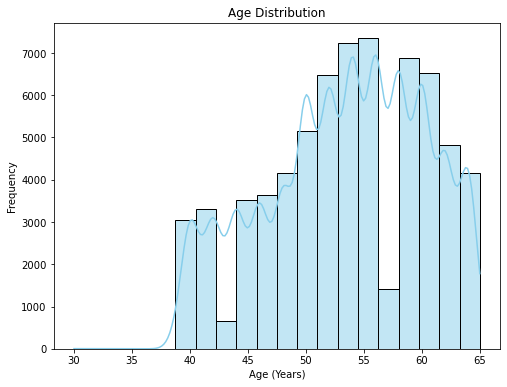

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['age_in_years'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()


# Gender Distribution

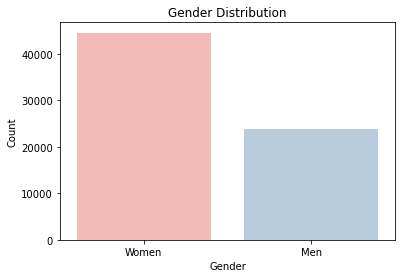

In [142]:
#(1 = Women, 2 = Men)
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data_cleaned, palette='Pastel1')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Women', 'Men']) 
plt.show()


# Height

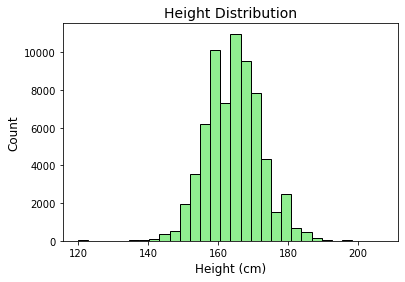

In [144]:
plt.figure(figsize=(6, 4))
plt.hist(data_cleaned['height'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Height Distribution', fontsize=14)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Weight

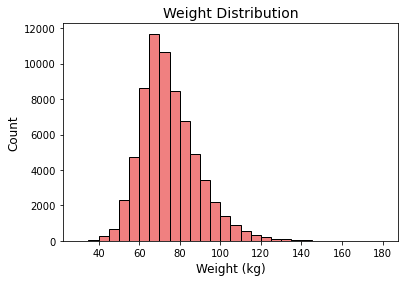

In [145]:
plt.figure(figsize=(6, 4))
plt.hist(data_cleaned['weight'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Weight Distribution', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# BMI Distribution

count    68359.000000
mean        27.457748
std          5.246071
min         10.726644
25%         23.875115
50%         26.346494
75%         30.119376
max        108.169847
Name: BMI, dtype: float64


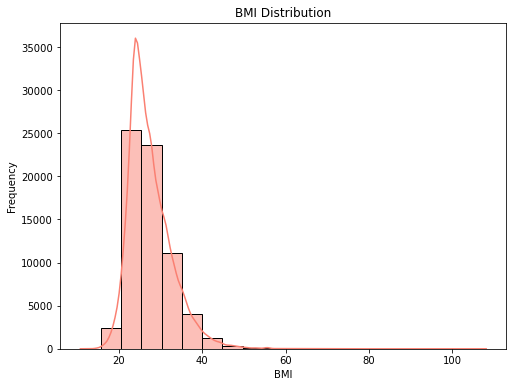

In [163]:
data_cleaned['BMI'] = data_cleaned['weight'] / ((data_cleaned['height']/100) ** 2)

# Descriptive statistics for BMI
print(data_cleaned['BMI'].describe())


plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['BMI'], bins=20, kde=True, color='salmon')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


# Blood Pressure Distribution

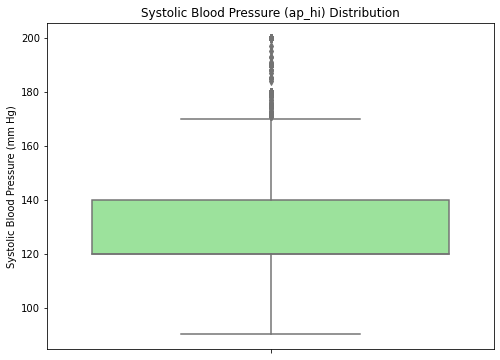

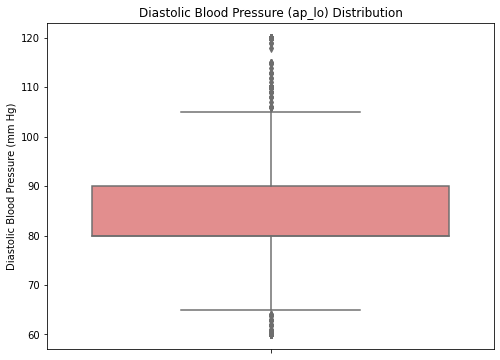

In [164]:
#Sysotlic
plt.figure(figsize=(8, 6))
sns.boxplot(y=data_cleaned['ap_hi'], color='lightgreen')
plt.title('Systolic Blood Pressure (ap_hi) Distribution')
plt.ylabel('Systolic Blood Pressure (mm Hg)')
plt.show()

# Diastolic Blood Pressure
plt.figure(figsize=(8, 6))
sns.boxplot(y=data_cleaned['ap_lo'], color='lightcoral')
plt.title('Diastolic Blood Pressure (ap_lo) Distribution')
plt.ylabel('Diastolic Blood Pressure (mm Hg)')
plt.show()


# Cholesterol Levels

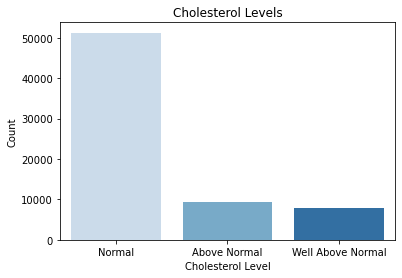

In [165]:
plt.figure(figsize=(6, 4))
sns.countplot(x='cholesterol', data=data_cleaned, palette='Blues')
plt.title('Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Normal', 'Above Normal', 'Well Above Normal'])
plt.show()


# Glucose Level

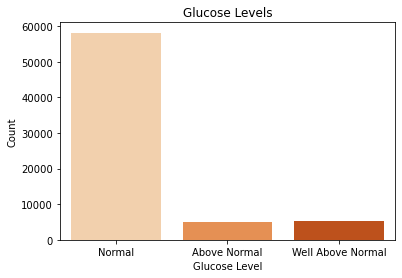

In [166]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gluc', data=data_cleaned, palette='Oranges')
plt.title('Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Normal', 'Above Normal', 'Well Above Normal'])
plt.show()


# Smoking and Cardiovascular Diseased

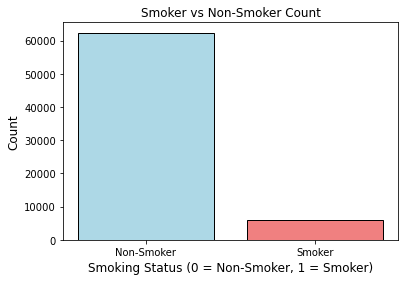

In [146]:
plt.figure(figsize=(6, 4))
plt.bar(data_cleaned['smoke'].value_counts().index, data_cleaned['smoke'].value_counts().values, color=['lightblue', 'lightcoral'], edgecolor='black')
plt.title('Smoker vs Non-Smoker Count')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

# Positive and Negative Correlations with Heatmap

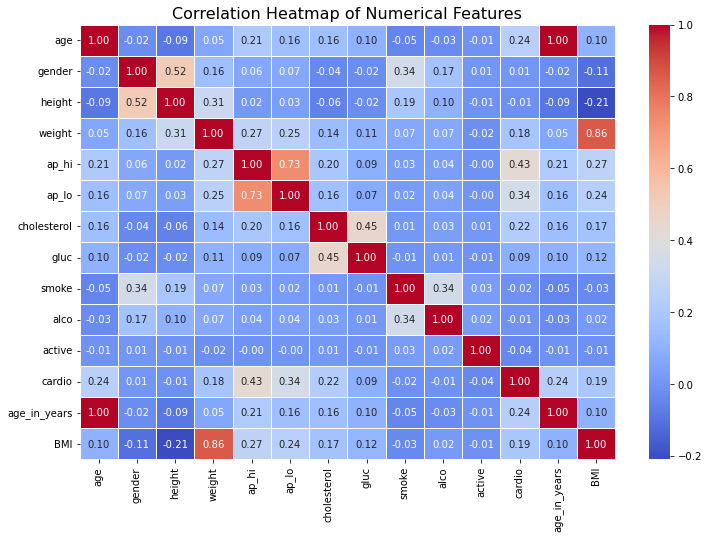

In [167]:
corr_matrix = data_cleaned.drop(columns=['id']).corr()

#heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

# Gender, BMI, and Age Group at Risk in Developing Cardiovascular Disease

In [157]:
gender_comparison = data_cleaned.groupby('gender').mean()[['ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'weight', 'height']]

data_cleaned['BMI'] = data_cleaned['weight'] / (data_cleaned['height'] / 100) ** 2

# Group by cardiovascular disease status and calculate the average BMI
bmi_comparison = data_cleaned.groupby('cardio')['BMI'].mean()

# age groups
bins = [30, 40, 50, 60, 70]
labels = ['30-40', '40-50', '50-60', '60-70']
data_cleaned['age_group'] = pd.cut(data_cleaned['age_in_years'], bins=bins, labels=labels)

# Group by age group and calculate the mean of key risk factors for cardiovascular disease
age_group_comparison = data_cleaned.groupby('age_group').mean()[['ap_hi', 'ap_lo', 'cholesterol', 'BMI']]


<Figure size 720x432 with 0 Axes>

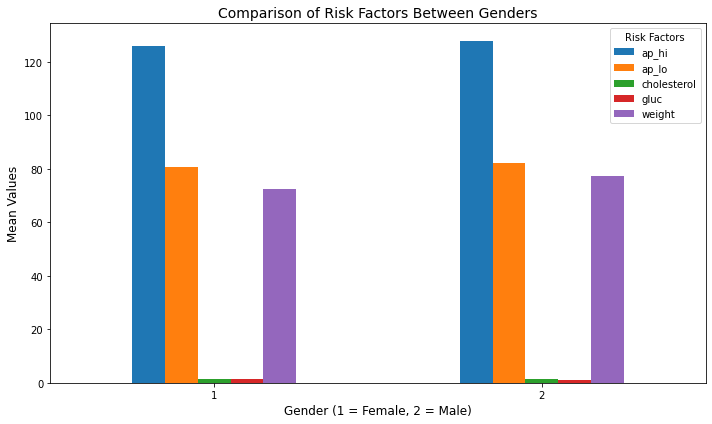

In [158]:
plt.figure(figsize=(10, 6))
gender_comparison[['ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'weight']].plot(kind='bar', figsize=(10,6), rot=0)
plt.title('Comparison of Risk Factors Between Genders', fontsize=14)
plt.xlabel('Gender (1 = Female, 2 = Male)', fontsize=12)
plt.ylabel('Mean Values', fontsize=12)
plt.legend(title='Risk Factors')
plt.tight_layout()
plt.show()

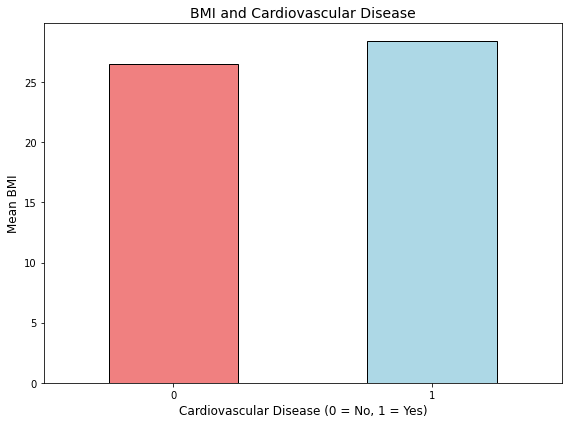

In [159]:
plt.figure(figsize=(8, 6))
bmi_comparison.plot(kind='bar', color=['lightcoral', 'lightblue'], edgecolor='black')
plt.title('BMI and Cardiovascular Disease', fontsize=14)
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Mean BMI', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

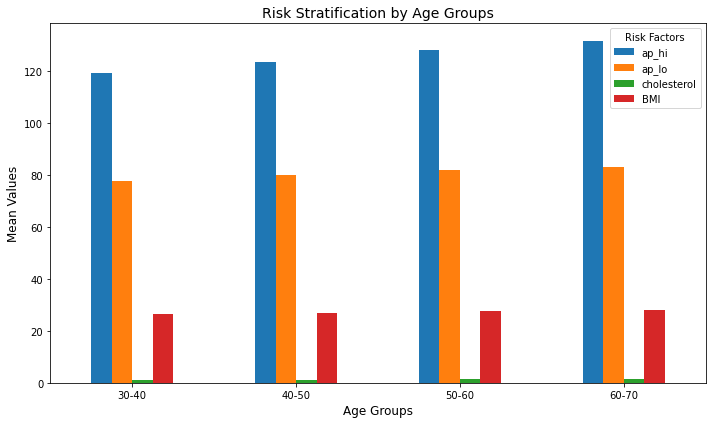

In [160]:
plt.figure(figsize=(10, 6))
age_group_comparison[['ap_hi', 'ap_lo', 'cholesterol', 'BMI']].plot(kind='bar', figsize=(10,6), rot=0)
plt.title('Risk Stratification by Age Groups', fontsize=14)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Mean Values', fontsize=12)
plt.legend(title='Risk Factors')
plt.tight_layout()
plt.show()